In [99]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import optimizers
import gc

In [100]:
# Get data
Data = pd.read_csv('Vibration_data_rand_ver2.csv',header = None)

In [101]:

# Variables
[m,n] = Data.shape
fn = n - 1

trainNum = int(m * 0.7)


# Shuffle data
Data = Data.sample(frac=1).reset_index(drop=True)

DataX = Data.iloc[:,0:fn]
DataY = Data.iloc[:,fn] -1


trainX = DataX.iloc[0:trainNum,:].values.astype(float);
trainY = DataY.iloc[0:trainNum].values.astype(float);
testX = DataX.iloc[trainNum:,].values.astype(float);
testY = DataY.iloc[trainNum:,].values.astype(float);

In [102]:
print(trainX.shape)

(11718, 26)


Train on 11718 samples
Epoch 1/10
11718/11718 [==============================] - 5s 409us/sample - loss: 0.7378 - acc: 0.7022
Epoch 2/10
11718/11718 [==============================] - 4s 356us/sample - loss: 0.1913 - acc: 0.9710
Epoch 3/10
11718/11718 [==============================] - 4s 348us/sample - loss: 0.0662 - acc: 0.9922
Epoch 4/10
11718/11718 [==============================] - 4s 351us/sample - loss: 0.0381 - acc: 0.9952
Epoch 5/10
11718/11718 [==============================] - 5s 387us/sample - loss: 0.0271 - acc: 0.9965
Epoch 6/10
11718/11718 [==============================] - 4s 370us/sample - loss: 0.0233 - acc: 0.9972
Epoch 7/10
11718/11718 [==============================] - 4s 363us/sample - loss: 0.0188 - acc: 0.9978
Epoch 8/10
11718/11718 [==============================] - 4s 358us/sample - loss: 0.0165 - acc: 0.9984
Epoch 9/10
11718/11718 [==============================] - 5s 394us/sample - loss: 0.0153 - acc: 0.9987
Epoch 10/10
11718/11718 [=========================

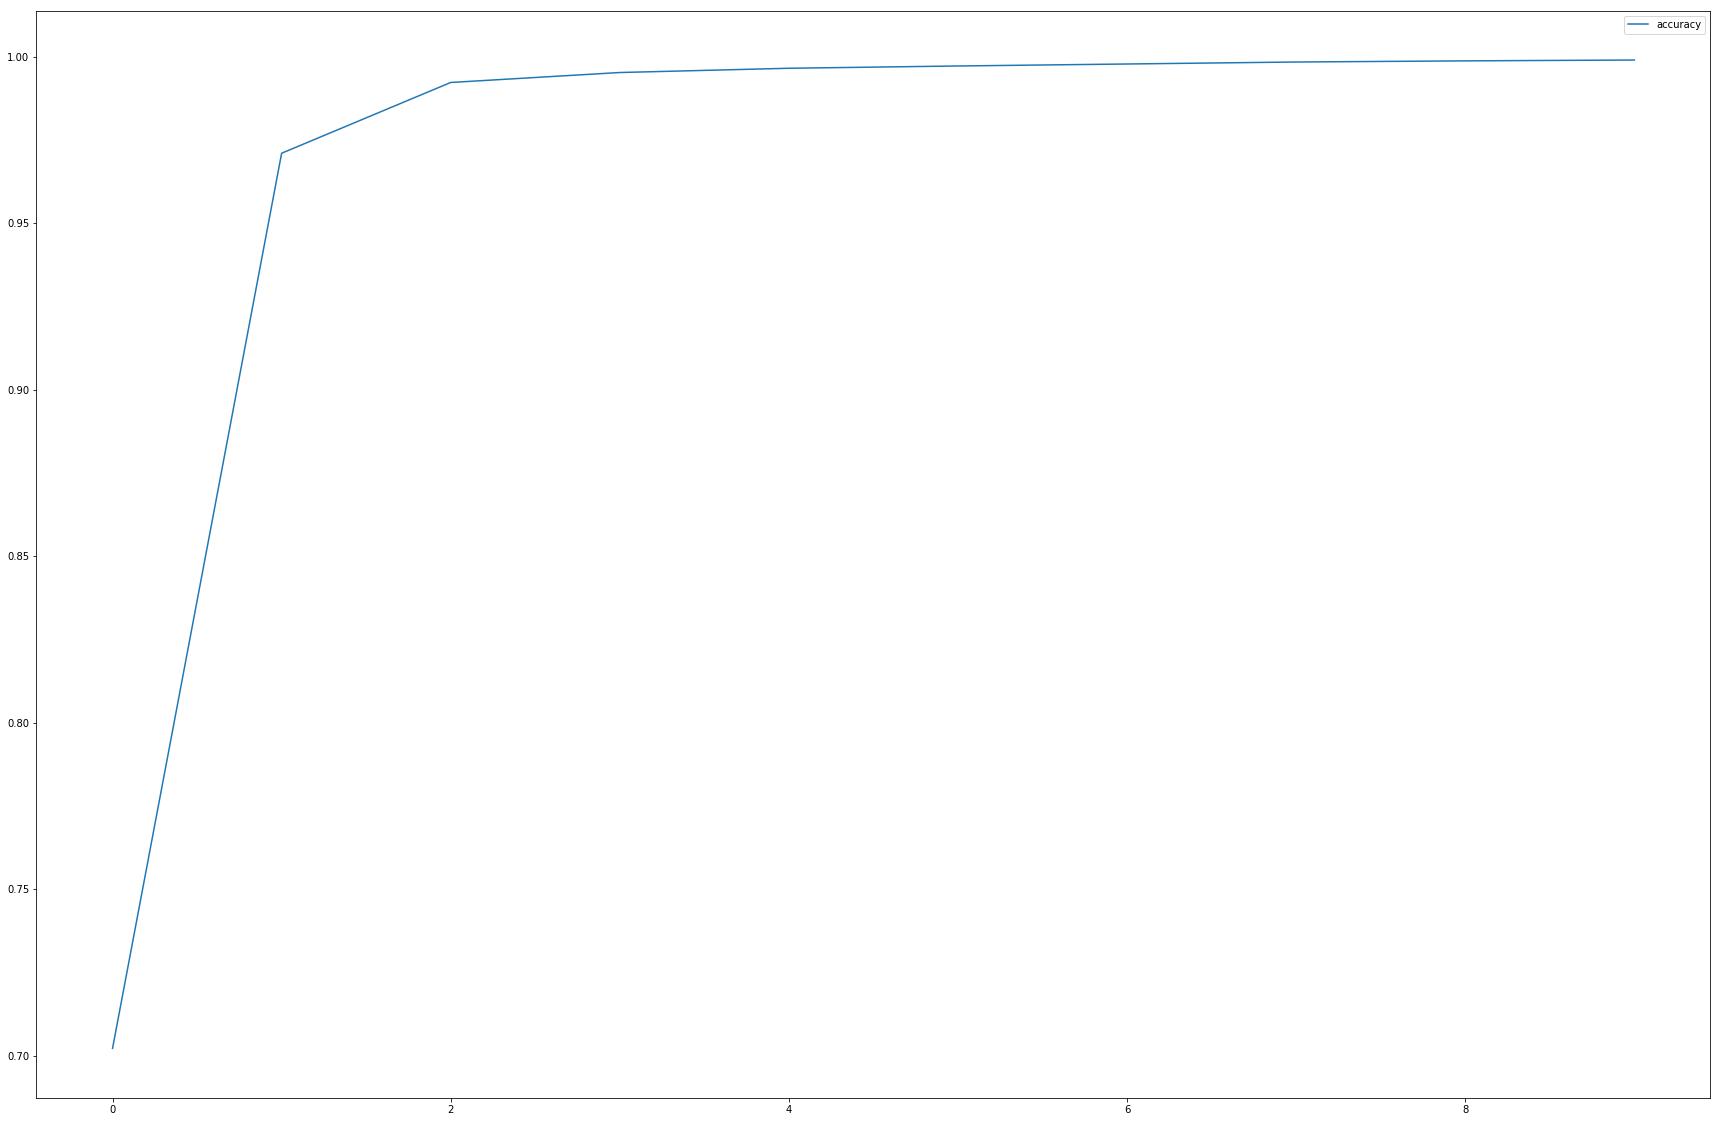

In [103]:
plt.figure(figsize = (30,20))

model = tf.keras.models.Sequential([        
    tf.keras.layers.Dense(500, activation = 'relu', input_shape = (26,)),
    tf.keras.layers.Dense(500, activation = 'sigmoid'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
acc = model.fit(trainX,trainY,epochs = 10, verbose = 1)
    
test_loss, test_acc = model.evaluate(testX,testY,verbose = 2)
plt.plot(acc.history['acc'],label = 'accuracy')
print("accuracy = {}".format(test_acc))
# release momory
gc.collect()
plt.legend()